In [131]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
import numpy as np
from collections import Counter
from netwulf import visualize   # pip install netwulf

In [ ]:
# Part 0: Networks

In [ ]:
# Ex. 9.0.1: List three different real networks and state the nodes and links for each of them.

# 1: Railway network: nodes are the stations and links are the railway between the stations
# 2: Facebook: nodes are individual facebook accounts and links are friendships
# 3: internet: nodes are homepages and links are hyperlinks

In [ ]:
# Ex. 9.0.2: What networks are you personally most interested in. Address the following questions:

# - What are its nodes and links?
# - How large is it?
# - Can be mapped out?
# - Why do you care about it?

# Facebook: nodes are individual facebook accounts and links are friendships. 
# Facebook has more than two billions user accounts
# Yes, we can map it ...
# Rich on data and can be used in multiple settings.

In [ ]:
# Ex. 9.0.3: In your view what would be the area where network science could have the biggest impact in the next decade? 
# Explain your answer - and base it on the text in the book

# Survailance due to massive available data.

In [ ]:
# Ex. 9.0.4: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many 
# connections? Is that network still sparse? If yes, can you explain why?

# The telephone network all phones can in theory dial all other telephones. However, in reality we only call some few different.

In [ ]:
# Part 1: The NetworkX library



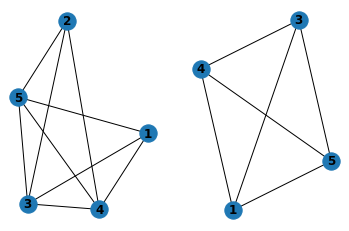

In [28]:
# Ex. 9.1.1: Go to the NetworkX project's tutorial page. Read the first few sections about nodes, edges and attributes. 
# Write an example below where you create a graph, G, and then:

# - add some nodes and edges to,
# - print its nodes and edges
# - delete a node, and
# - plot it.

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 3), (2,3), (2,4), (3,4), (3,5), (4,5), (4,1), (5,1), (5,2)])

#list(G.nodes)
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')


H = G
H.remove_node(2)

plt.subplot(122)
nx.draw(H, with_labels=True, font_weight='bold')



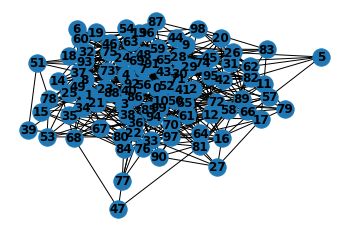

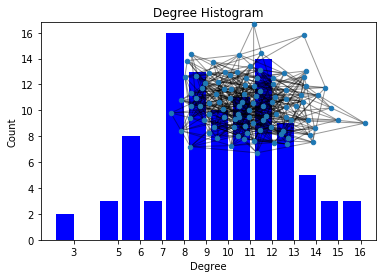

In [48]:
# Ex. 9.1.2: NetworkX has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks 
# is called an Erdős–Rényi (ER) network.

# - Describe what an ER network is and how to create one. 
# - On the NetworkX documentations site, find a method you can use for generating an ER network. Create one with $N=100$ nodes 
# and probability of edge creation $p=0.1$. 
# - Plot the network
# - Visualize the degree distribution of your newly created ER graph. (A node's degree is the number of other nodes it is 
# connected to. The degree distribution is a histogram which shows the distribution of node degrees.)

# An ER network is a synthetic network that is generated from the Erdos-Reneyi random graph model given by G(n,p) where n
# is the number of nodes in the synthetic network and p is the probability that each node is linked and p is assumed to be
# independent from every other link. We can create an ER network by specifying n and p. For each pair of nodes we randomly 
# sample a number from the uniform distribution. If this number is larger than p we link the two nodes. We do this for all
# pairs of nodes in the network. Note that this network is a simple network, since it is undirected, unweighted and contains
# no self-loops. Due to the independence assumption a synthetic network generated from the Erdos-Reneyi random graph model
# will have low clustering, unlike many social networks.

er = nx.erdos_renyi_graph(100, 0.1)

plt.plot()
nx.draw(er, with_labels=True, font_weight='bold')

degree_sequence = sorted([d for n, d in er.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = er.subgraph(sorted(nx.connected_components(er), key=len, reverse=True)[0])
pos = nx.spring_layout(er)
plt.axis('off')
nx.draw_networkx_nodes(er, pos, node_size=20)
nx.draw_networkx_edges(er, pos, alpha=0.4)

(array([951.,   5.,  10.,   5.,   0.,   0.,  12.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

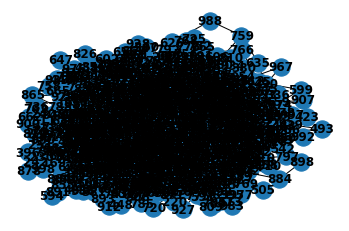

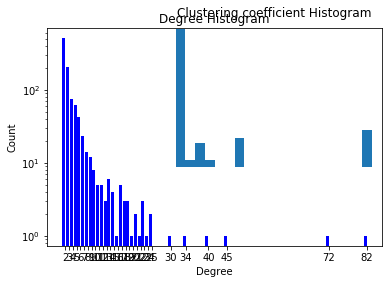

In [142]:
# Ex. 9.1.3: Another very famous type of synthetic network is the Barabási–Albert (BA) network.

# - Describe what a BA network is and how to create one.
# - On the NetworkX documentations site, find a method you can use for generating a BA network. Create one with $N=100$ nodes 
# and number of new edges from each new node $m=2$.
# - Plot the network
# Visualize the degree distribution of your newly created BA graph.
# Explain the main difference(s) you observe, when comparing to the ER network.
# Are there other measures we could have used to describe the ER and BA networks further?

# A BA network is a synthetic network generated from Barabási–Albert model which incorporates two important general concepts: 
# growth and preferential attachment. Both growth and preferential attachment exist widely in real networks. Growth means that 
# the number of nodes in the network increases over time. Preferential attachment means that the more connected a node is, the 
# more likely it is to receive new links. The network begins with an initial connected network of m_o nodes. New nodes are 
# added to the network one at a time. Each new node is connected to m=<m_0 existing nodes with a probability that is 
# proportional to the number of links that the existing nodes already have. Hence, heavily linked nodes ("hubs") tend to 
# quickly accumulate even more links, while nodes with only a few links are unlikely to be chosen as the destination for a new 
# link. The new nodes have a "preference" to attach themselves to the already heavily linked nodes.

ba = nx.barabasi_albert_graph(1000, 2)
plt.plot()
nx.draw(ba, with_labels=True, font_weight='bold')

degree_sequence = sorted([d for n, d in ba.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.yscale('log')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = ba.subgraph(sorted(nx.connected_components(er), key=len, reverse=True)[0])
pos = nx.spring_layout(er)
plt.axis('off')
#nx.draw_networkx_nodes(ba, pos, node_size=20)
#nx.draw_networkx_edges(ba, pos, alpha=0.4)

# The BA network is an example of a scale-free network whose degree distribution asymptocially follows a power law.
# Hence, from the histogram we see that the number nodes with k links is exponential declining in k. For the 
# ER network the distribution of nodes with k links is concentrated around the expected mean of k=100*0.1=10 links.

# Alternative measures could be the clustering coefficient that captures the degree to which the neighbors of a given 
# node link to each other or the  average path length that is a measure for how dense the network is or .


In [73]:
# Part 2: Facebook network

data = pd.read_csv(
    'facebook-wall.txt.gz', 
    compression='gzip',
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp'], 
    sep=' ', quotechar='"', error_bad_lines=False)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


In [101]:
# Ex: 9.2.1: Convert the above sample code into a function where you can easily input t0 and t1 of the slice, and get a 
# nx.DiGraph in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

def SliceDiGraph(data,t0,t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G_t

t0 = data.timestamp.max() - 86400 * 365  # Lower bound of time-slice (here: 365 days before last wall post)
t1 = data.timestamp.max() # Lower bound of time-slice

G_t = SliceDiGraph(data,t0,t1)

print("number of edges =", G_t.number_of_edges())
print("number of nodes =", G_t.number_of_nodes())

#plt.plot()
#nx.draw(G_t, with_labels=True, font_weight='bold')

number of edges = 201632
number of nodes = 44397


Text(0.5, 0, 'Out-degree')

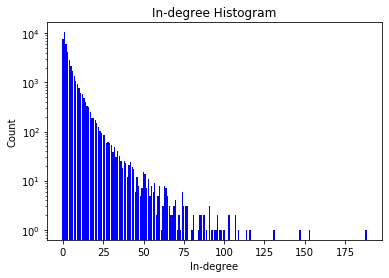

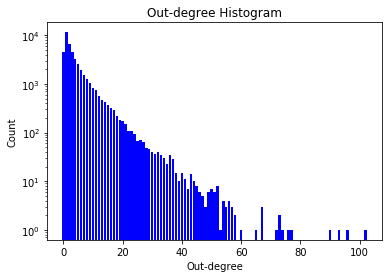

In [111]:
# Ex: 9.2.2: Since it's a directed network, there are two degree distributions we can plot: one for the in-degrees and another 
# for the out-degrees. Plot them both in the same figure (remember to add a legend). The distribution is very heavy-tailed, so 
# you may want to log-scale both axes. Comment on the result. Does it resemble any of the network models you know?

in_degree_sequence  = sorted([d for n, d in G_t.in_degree() ], reverse=True)  # in-degree sequence
out_degree_sequence = sorted([d for n, d in G_t.out_degree()], reverse=True)  # out-degree sequence

# print "In degree sequence", degree_sequence
in_degreeCount = Counter(in_degree_sequence)
in_deg, in_cnt = zip(*in_degreeCount.items())

# print "Out degree sequence", degree_sequence
out_degreeCount = Counter(out_degree_sequence)
out_deg, out_cnt = zip(*out_degreeCount.items())

fig, ax = plt.subplots()
plt.bar(in_deg, in_cnt, width=0.80, color='b')

plt.yscale('log')

plt.title("In-degree Histogram")
plt.ylabel("Count")
plt.xlabel("In-degree")

fig, ax = plt.subplots()
plt.bar(out_deg, out_cnt, width=0.80, color='b')

plt.yscale('log')

plt.title("Out-degree Histogram")
plt.ylabel("Count")
plt.xlabel("Out-degree")



(array([2.9294e+04, 5.1920e+03, 3.0350e+03, 1.8100e+03, 1.1590e+03,
        7.5300e+02, 7.1600e+02, 1.7100e+02, 3.2100e+02, 7.4000e+01,
        7.9300e+02, 7.6000e+01, 4.6000e+01, 9.2000e+01, 6.0000e+00,
        4.5000e+01, 3.6000e+01, 7.0000e+00, 4.0000e+00, 7.6700e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

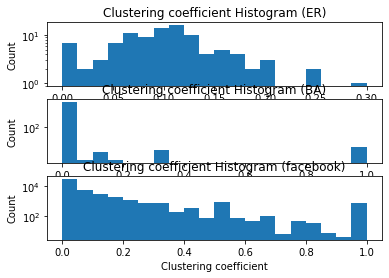

In [150]:
# Ex: 9.2.3: Using a histogram plot the distribution of (weighted) local clustering coefficients (docs). Which distribution 
# does it appear to follow?

coef = nx.clustering(er)

plt.subplot(3, 1, 1)

plt.yscale('log')

plt.title("Clustering coefficient Histogram (ER)")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")

plt.hist(coef.values(),bins=20)

coef = nx.clustering(ba)

plt.subplot(3, 1, 2)

plt.yscale('log')

plt.title("Clustering coefficient Histogram (BA)")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")

plt.hist(coef.values(),bins=20)

coef = nx.clustering(G_t)

plt.subplot(3, 1, 3)

plt.yscale('log')

plt.title("Clustering coefficient Histogram (facebook)")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")

plt.hist(coef.values(),bins=20)




In [ ]:
# Ex: 9.2.4: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a 
# visualization of it using netwulf, style the network so it looks nice and download (or screenshot) the figure and put it 
# into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result.
# Do you see anything interesting in this network or is it just a big hairball?

(array([2.9294e+04, 5.1920e+03, 3.0350e+03, 1.8100e+03, 1.1590e+03,
        7.5300e+02, 7.1600e+02, 1.7100e+02, 3.2100e+02, 7.4000e+01,
        7.9300e+02, 7.6000e+01, 4.6000e+01, 9.2000e+01, 6.0000e+00,
        4.5000e+01, 3.6000e+01, 7.0000e+00, 4.0000e+00, 7.6700e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

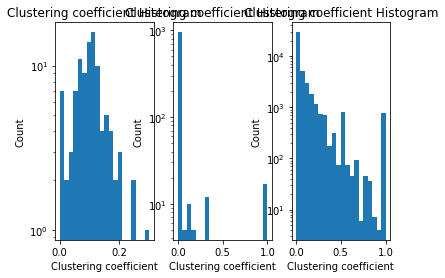

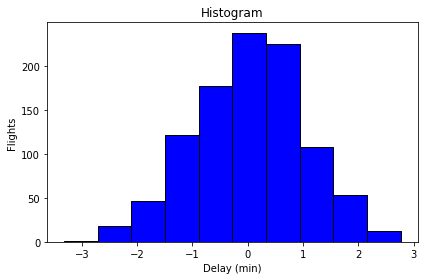

In [132]:
ax = plt.subplot()

n=np.random.normal(0, 1, 1000)

ax.hist(n, bins =10, color = 'blue', edgecolor = 'black')
# Title and labels
ax.set_title('Histogram')
ax.set_xlabel('Delay (min)')
ax.set_ylabel('Flights')

plt.tight_layout()
plt.show()